# Breast Cancer Classification

**Objective:** Classify tumors as benign or malignant

**Data:** Wisconsin Breast Cancer Database https://www.kaggle.com/chongchong33/breast-cancer-wisconsin-classification/data 

### Information about the data set:

**Features:**
1. `id`: Sample code number id number
2. `clump_thickness`: Clump Thickness 1-10
3. `size_uniformity`: Uniformity of Cell Size 1-10
4. `shape_uniformity`: Uniformity of Cell Shape 1-10
5. `marginial_adhesion`: Marginal Adhesion 1-10
6. `epithelial_size`: Single Epithelial Cell Size 1-10
7. `bare_nucleoli`: Bare Nuclei 1-10
8. `bland_chromatin`: Bland Chromatin 1-10
9. `normal_nucleoli`: Normal Nucleoli 1-10
10. `mitoses`: Mitoses 1-10  

**Target:**  

11. `class`: Class 2 for benign, 4 for malignant

**Class distribution:**

Benign: 458 (65.5%)  
Malignant: 241 (34.5%)

**Missing attribute values:**

16; denoted by "`?`"





In [1]:
import os
os.chdir('C:\\Users\\vrsom\\Documents\\Breast_Cancer_Classification\\tumor-classification\\') 
os.getcwd() 

'C:\\Users\\vrsom\\Documents\\Breast_Cancer_Classification\\tumor-classification'

## Data cleaning and preprocessing

In [2]:
import pandas as pd
import os

df = pd.read_csv('breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Find missing values:

In [3]:
mask = df=='?'
mask.sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

Change 16 missing values in `bare_nucleoli` to NaN:

In [4]:
df[mask]=float('NaN')

Show info:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      683 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


Delete rows with NaNs and change all data types to int:

In [6]:
df = df.dropna()
df = df.astype('int64')

Change classes to `False` (benign) and `True` (malignant) instead of 2 and 4:

In [7]:
df.loc[:,'class'] = df.loc[:,'class']==4
display(df.loc[:,'class'])

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696     True
697     True
698     True
Name: class, Length: 683, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 683 non-null    int64
 1   clump_thickness    683 non-null    int64
 2   size_uniformity    683 non-null    int64
 3   shape_uniformity   683 non-null    int64
 4   marginal_adhesion  683 non-null    int64
 5   epithelial_size    683 non-null    int64
 6   bare_nucleoli      683 non-null    int64
 7   bland_chromatin    683 non-null    int64
 8   normal_nucleoli    683 non-null    int64
 9   mitoses            683 non-null    int64
 10  class              683 non-null    bool 
dtypes: bool(1), int64(10)
memory usage: 59.4 KB


Check means, range etc.:

In [9]:
print(df.drop('id',axis=1).describe())

       clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
count       683.000000       683.000000        683.000000         683.000000   
mean          4.442167         3.150805          3.215227           2.830161   
std           2.820761         3.065145          2.988581           2.864562   
min           1.000000         1.000000          1.000000           1.000000   
25%           2.000000         1.000000          1.000000           1.000000   
50%           4.000000         1.000000          1.000000           1.000000   
75%           6.000000         5.000000          5.000000           4.000000   
max          10.000000        10.000000         10.000000          10.000000   

       epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  \
count       683.000000     683.000000       683.000000       683.000000   
mean          3.234261       3.544656         3.445095         2.869693   
std           2.223085       3.643857         2.449697

I don't see anything unusual. Now, the data set has no missing or impossible values. 

## Splitting data

First, randomly separate 30% of the data points into a validation data set. This is important to validate the classifier on **independent** data later on.

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df,test_size=0.3,random_state=1)

Now separate feature matrix and target vector:

In [11]:
features_train = df_train.drop(['id','class'],axis=1)
features_val = df_val.drop(['id','class'],axis=1)

target_train = df_train.loc[:,'class']
target_val = df_val.loc[:,'class']

display(features_train)
display(target_train)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
631,5,1,1,1,2,1,2,1,1
633,8,7,4,4,5,3,5,10,1
203,5,1,1,1,2,1,3,1,1
42,6,10,10,2,8,10,7,3,3
571,7,6,10,5,3,10,9,10,2
...,...,...,...,...,...,...,...,...,...
148,3,1,1,3,8,1,5,8,1
661,4,1,1,1,2,1,3,1,1
74,10,6,4,1,3,4,3,2,3
242,2,1,1,1,2,1,3,1,1


631    False
633     True
203    False
42      True
571     True
       ...  
148    False
661    False
74      True
242    False
38      True
Name: class, Length: 478, dtype: bool

## Check for correlations among features and reduce dimensions with Principal Component Analysis (PCA)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
clump_thickness,1.000000,0.635755,0.650366,0.507064,0.524288,0.609916,0.557279,0.554315,0.366344
size_uniformity,0.635755,1.000000,0.917607,0.711849,0.748319,0.707644,0.763875,0.743973,0.490808
shape_uniformity,0.650366,0.917607,1.000000,0.692717,0.711943,0.718284,0.725238,0.737787,0.470340
marginal_adhesion,0.507064,0.711849,0.692717,1.000000,0.592563,0.716376,0.676607,0.607801,0.394772
epithelial_size,0.524288,0.748319,0.711943,0.592563,1.000000,0.576429,0.611069,0.672823,0.506416
bare_nucleoli,0.609916,0.707644,0.718284,0.716376,0.576429,1.000000,0.678199,0.574645,0.362370
bland_chromatin,0.557279,0.763875,0.725238,0.676607,0.611069,0.678199,1.000000,0.679565,0.350437
normal_nucleoli,0.554315,0.743973,0.737787,0.607801,0.672823,0.574645,0.679565,1.000000,0.443686
mitoses,0.366344,0.490808,0.470340,0.394772,0.506416,0.362370,0.350437,0.443686,1.000000


p = 2.942751174831744e-15


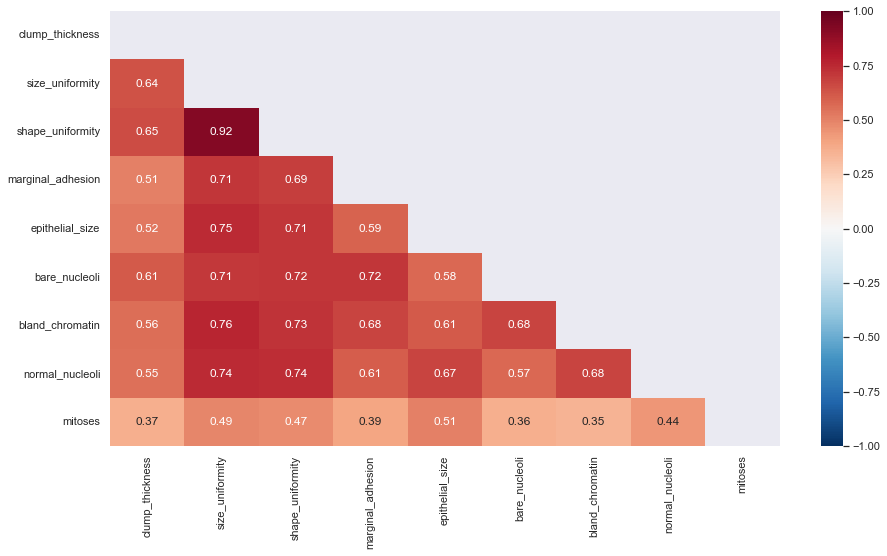

In [12]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Correlation matrix
corr = features_train.corr()
display(corr)

# Heatmap of all pairwise correlations
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='RdBu_r');

r,p = pearsonr(features_train.loc[:,'mitoses'],features_train.loc[:,'bland_chromatin'])
print('p = {}'.format(p))

The features show to be highly correlated to each other. Even the smallest correlation (between mitoses and bland_chromatin) is highly significant; see p-value. This means the features are not independent.

To have independent features, I use an **Principal Component Ananlysis (PCA)** reducing the dimensions.  
I define a pipeline `corr_transformer` that standardizes the data and computes a PCA including all columns except those specified in `keep_cols`. Because all features are correlated, I do not keep any of the original features, thus, `keep_cols` is empty here. For the PCA, I define that it should keep at least 80% of the variance in the data. Finally I fit and apply the pipeline on the training data.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# if I wanted to leave out a feature from the PCA (e.g. mitoses because 
# it is less correlated to the others --> yields similar classification accuracy)
keep_cols = [] 

# features that are highly correlated
col_correlated = features_train.drop(keep_cols,axis=1).columns
    
# standardization + PCA (dimensionality reduction, keeping min. 80% of variance)
std_pca = Pipeline([('std', StandardScaler()), 
                    ('pca', PCA(n_components=0.8))
                   ])

# do nothing with keep_cols, drop rest (none in this case)
col_dropper = ColumnTransformer([('drop_unused_cols', 'passthrough', keep_cols)],
                                remainder='drop'
                               )
    
# PCA on cor_correlated only
corr_transformer = ColumnTransformer([('pca', std_pca, col_correlated)],
                                     remainder=col_dropper
                                    )

# fit & transform
arr = corr_transformer.fit_transform(features_train)
arr.shape

(478, 3)

The output from the transformation is an array with the columns representing the identified principal components. That means 7 features were reduced to 3 in this case.

I turn the array into a dataframe `features_train_pca` and transform the validation data in the same way (`features_val_pca`):

In [14]:
# transform training- and validation data
col_names = ['pca_0','pca_1','pca_2'] + keep_cols
features_train_pca = pd.DataFrame(arr, columns=col_names)
features_val_pca = pd.DataFrame(corr_transformer.transform(features_val), columns=col_names)
display(features_train_pca)

,pca_0,pca_1,pca_2
0,-1.607496,0.009278,-0.638855
1,2.271799,-0.371072,-0.001566
2,-1.467713,-0.091419,-0.553935
3,3.834433,0.215161,0.120485
4,3.958294,-1.112170,0.201717
...,...,...,...
473,0.540240,0.407648,1.481363
474,-1.573993,-0.050177,-0.246815
475,0.890899,0.552171,-2.011536
476,-1.786554,0.032307,0.367426


Checking for correlations again shows that the new features are independent:

<AxesSubplot:>

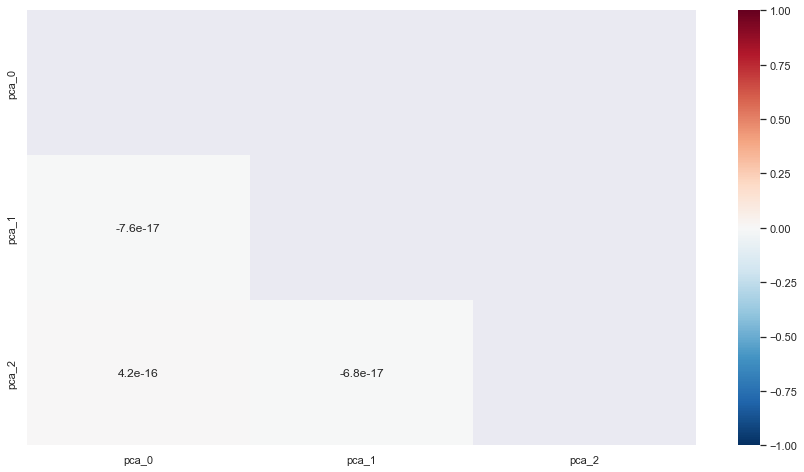

In [15]:
# correlation 
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(features_train_pca.corr(), mask=np.triu(np.ones_like(features_train_pca.corr(), dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='RdBu_r')

## Building the Artificial Neural Network (ANN)

Now I build the feedforward ANN. I define 5 hidden layers, each with 50 nodes ("neurons") and a rectified linear unit (ReLu) activation function. An activation function transforms the summed weighted input from the node into the activation (output) of the node. The ReLu activation function is a suitable choice for hidden layers; it outputs the summed weighted input directly if it is positive, otherwise, it outputs zero. 
The first hidden layer receives the dimensions of the features (i.e., 3), that make up the input layer. The output layer contains 1 node and a sigmoid activation function, which is appropriate for classification tasks.

In [22]:
# ANN with early stopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model_ann = Sequential()

# define hidden layers
hidden_first = Dense(units=50, activation='relu', input_dim=features_train_pca.shape[1])
hidden_second = Dense(units=50, activation='relu')
hidden_third = Dense(units=50, activation='relu')
hidden_fourth = Dense(units=50, activation='relu')
hidden_fifth = Dense(units=50, activation='relu')

# define output layer
output_layer  = Dense(units=1, activation='sigmoid')

# add 5 hidden layers with 50 units
model_ann.add(hidden_first)
model_ann.add(hidden_second)
model_ann.add(hidden_third)
model_ann.add(hidden_fourth)
model_ann.add(hidden_fifth)

# add output layer
model_ann.add(output_layer)

Then I compile the model and add an early stopping mechanism that stops the training when a monitored metric is not improving anymore. In this way, unnecessary computing time and overfitting can be prevented.

For the compilation of the model, I choose an optimizer and a loss function. The loss function specifies the quantity that a model should seek to minimize during training. Binary cross-entropy is a good choice for binary classifications based on probabilities. The optimizer is the algorithm that changes the weights to reduce the loss. The Adam algorithm is often used because of its robust results, computationally efficiency, and little memory requirement.

Finally I fit the model on the training data and validate the classification accuracy on the validation data. The training needs several iterations (epochs) because the weights are optimized stepwise, however, too many iterations can lead to overfitting. Therefore, I specify that the training stops when the validation accuracy does not change more than 0.001 within 3 epochs. 

In [23]:
# compile model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=3)

# train model using early stopping
hist_ann = model_ann.fit(features_train_pca, target_train,
                         epochs=200, batch_size=64,
                         callbacks=[early_stop],
                         validation_data=(features_val_pca, target_val))

Epoch 1/200
8/8 [==============================] - 1s 38ms/step - loss: 0.5915 - accuracy: 0.8159 - val_loss: 0.4893 - val_accuracy: 0.9366
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.4101 - accuracy: 0.9665 - val_loss: 0.3043 - val_accuracy: 0.9659
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2351 - accuracy: 0.9707 - val_loss: 0.1564 - val_accuracy: 0.9707
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1252 - accuracy: 0.9686 - val_loss: 0.0851 - val_accuracy: 0.9756
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0804 - accuracy: 0.9707 - val_loss: 0.0680 - val_accuracy: 0.9805
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0744 - accuracy: 0.9707 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 7/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0753 - accuracy: 0.9707 - val_loss: 0.0712 - val_accuracy: 0.9805
Epoch 8/200
8/8 [=======

After a few epochs, the training stops at a validation accuracy of >98% (exact value can vary).

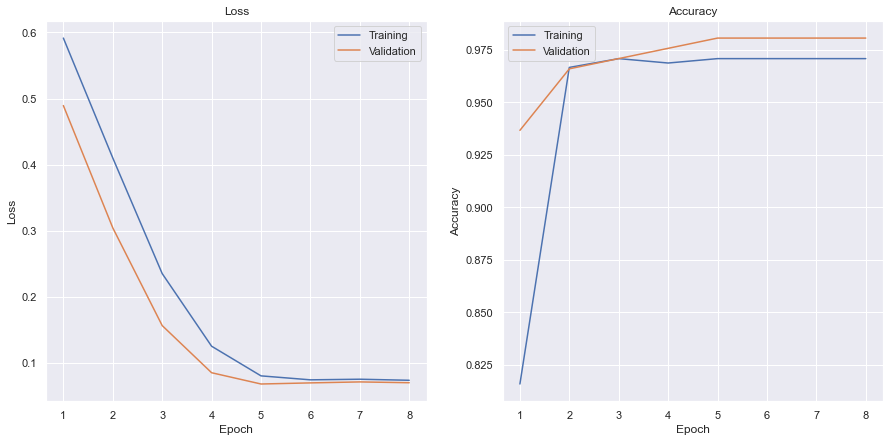

In [24]:
# illustrate 
x = range(1,len(hist_ann.history['loss'])+1)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))  
ax1.plot(x, hist_ann.history['loss'])
ax1.plot(x, hist_ann.history['val_loss'])
ax1.set_title('Loss')
ax1.legend(['Training', 'Validation'])
ax1.set(ylabel='Loss', xlabel='Epoch', xticks=x)
#plt.xticks([x])

ax2.plot(x, hist_ann.history['accuracy'])
ax2.plot(x, hist_ann.history['val_accuracy'])
ax2.set_title('Accuracy')
ax2.legend(['Training', 'Validation'])
ax2.set(ylabel='Accuracy', xlabel='Epoch', xticks=x);

For me, the graphs look like this:
![graphs](graphs.jpg)

The graphs show that the training stopped after 9 epochs because the validation accuracy did not change much anymore. With every training iteration, the loss is reduced and converges for the training and validation data. A divergence, on the contrary, would indicate overfitting. 

## Result

By reducing the dimensionality of the features and training a deep, feedforward ANN, **the tumors can be classified as malignant or benign with an accuracy of ca. 98%**.  

## Notes / Alternatives

Accuracy is the number of correctly predicted data points (i.e., both malignant and benign) out of all the data points. If it was more important to correctly classify either malignant or benign tumors, one may want to use another validation metric instead. 

Because the features (tumor specifications) were highly correlated, I used a PCA to reduce the dimensions and replace the original features by orthogonal components. This results in a high accuracy for classifying tumors. However, based on the components, it is now hard to say what features and values were important for the classification. In general, ANNs are so-called blackbox algorithms, whose results are relatively hard to interpret. An alternative approach would be a binary classification tree or random forest, which generally offer more straightforward interpretability. 